In [1]:
# from lxml import etree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.collections import PatchCollection
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon
from shapely.prepared import prep
from descartes import PolygonPatch
import fiona
import os

In [2]:
import pyproj # for converting proj4string
import geopandas as gpd
import contextily as ctx
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

In [4]:
## Set up directory referencing
# Package data
gwfm_dir = os.path.dirname(os.path.dirname(os.getcwd()))

In [13]:
rivpath = gwfm_dir+"/SFR_data\\Sac_valley_rivers\\Sac_valley_rivers.shp"
mb_name = gwfm_dir+"/NewModelDomain/GWModelDomain_52_9deg_UTM10N_WGS84.shp"
# mb_name = gwfm_dir+"/GWModelDomain_UTM10N/GWModelDomain_Rec_UTM10N.shp"
capath = gwfm_dir+"/Mapping\\ca_state_boundary\\CA_State_TIGER2016.shp"
soampath = gwfm_dir+"/Mapping\\so_am_subbasin\\so_am_subbasin.shp"
cospath = gwfm_dir+"/Mapping\\cos_subbasin\\cos_subbasin.shp"

In [14]:
rivers = gpd.read_file(rivpath)
rivers = rivers.to_crs('EPSG:32610')

mb = gpd.read_file(mb_name)
rivers_clip = gpd.clip(rivers, mb)

soam = gpd.read_file(soampath)
soam = soam.to_crs('EPSG:32610')
cos = gpd.read_file(cospath)
cos = cos.to_crs('EPSG:32610')

ca = gpd.read_file(capath)
ca = ca.to_crs('EPSG:32610')

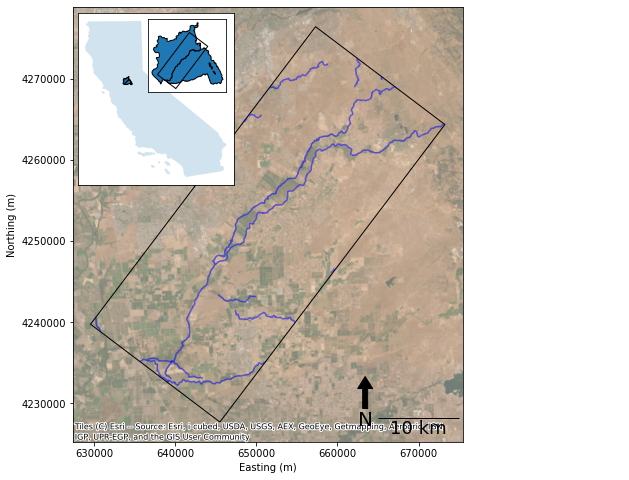

In [15]:
ax = rivers_clip.plot(color = 'blue', figsize=(8, 8), alpha=0.5, edgecolor='k')
mb.plot(edgecolor = 'black', color = 'none', ax = ax)

ctx.add_basemap(ax, source = ctx.providers.Esri.WorldImagery, crs='epsg:26910', alpha = 0.6)
# ctx.add_basemap(ax, source = ctx.providers.Esri.WorldStreetMap, crs='epsg:26910')

x, y, arrow_length = 0.75, 0.15, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

ax.ticklabel_format(style='plain')


fontprops = fm.FontProperties(size=18)
scalebar = AnchoredSizeBar(ax.transData,
                           10000, '10 km', 'lower right', 
                           pad=0.1,
                           sep=2,
                           color='black',
                           frameon=False,
                           size_vertical=1,
                           fontproperties=fontprops)
ax.add_artist(scalebar)

plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
# first one is CA map
axins = inset_axes(ax, width="80%", height="80%", bbox_to_anchor=(0, .5, .5, .5),
                  bbox_transform=ax.transAxes, loc=2)
# second one is smaller inset
axins2 = inset_axes(ax, width="40%", height="40%", bbox_to_anchor=(0.18, .5, .5, .5),
                  bbox_transform=ax.transAxes, loc=2)
axins.tick_params(labelleft=False, labelbottom=False, left = False, bottom = False)
axins2.tick_params(labelleft=False, labelbottom=False, left = False, bottom = False)


ca.plot(ax = axins,alpha = 0.2)
soam.plot(ax = axins, edgecolor = 'black')
cos.plot(ax = axins, edgecolor = 'black')
cos.plot(ax = axins2, edgecolor = 'black')

soam.plot(ax = axins2, edgecolor = 'black')
mb.plot(ax = axins2, edgecolor = 'black', color = 'none')
plt.savefig('Plots/GSA_2020_Floodplain/inset_map_model.png', dpi = 600, bbox_inches='tight')

## sensor plotting

In [ ]:
sensors = gpd.read_file(gwfm_dir+"/DEM_data/allsensor_latlong.csv")
sensors.Latitude = sensors.Latitude.astype(np.float64)
sensors.Longitude = sensors.Longitude.astype(np.float64)
sensors.geometry = gpd.points_from_xy(sensors.Longitude, sensors.Latitude)
sensors.crs = 'epsg:4326'
sensors = sensors.to_crs('epsg:32610')


In [ ]:
import contextily as ctx
fig, ax = plt.subplots(figsize = (10,10))
mg.plot(ax=ax, alpha = 0.3)
sensors.plot(ax =ax)

ctx.add_basemap(ax, source = ctx.providers.Esri.WorldImagery, crs='epsg:26910', alpha = 0.6)
# ctx.add_basemap(ax, source = ctx.providers.Esri.WorldStreetMap, crs=tg.crs.to_string())

plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
# plt.savefig('Plots/Model_SFR_UZF_progress/Model_grid_overlay_satellite.png', dpi = 300)

## floodplain plotting

In [ ]:
fp_sensors = gpd.read_file(gwfm_dir+"/LAK_data/floodplain_logger_metadata.csv", header = True)
fp_sensors.Northing = fp_sensors.Northing.astype(np.float64)
fp_sensors.Easting = fp_sensors.Easting.astype(np.float64)
fp_sensors.geometry = gpd.points_from_xy(fp_sensors.Easting, fp_sensors.Northing)
fp_sensors.crs = 'epsg:32610'

# Load location of monitoring wells
od_mw = gpd.read_file(gwfm_dir+"/LAK_data/OnetoDenier_monitoring_well_location.csv", header = True)
od_mw.Latitude = od_mw.Latitude.astype(np.float64)
od_mw.Longitude = od_mw.Longitude.astype(np.float64)
od_mw.geometry = gpd.points_from_xy(od_mw.Longitude, od_mw.Latitude)
od_mw.crs = 'epsg:4326'
od_mw = od_mw.to_crs('epsg:32610')

In [ ]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredDirectionArrows


fig, ax = plt.subplots(figsize = (10,10))
# lakdom.plot(ax =ax, color = 'red', alpha = 0.1)
lak2D.plot(ax =ax, color = 'red', alpha = 0.1)


# fp_sensors.plot(ax=ax, column = 'Logger Type', marker = '*', legend = True, label = 'Surface Water Level Sensor')
fp_sensors[fp_sensors['Logger Type']=='River'].plot(ax=ax, label = 'River Level Sensor')
fp_sensors[fp_sensors['Logger Type']=='Breach'].plot(ax=ax, label = 'Breach Level Sensor')
fp_sensors[fp_sensors['Logger Type']=='Floodplain'].plot(ax=ax, label = 'Floodplain Level Sensor')
od_mw.plot(ax=ax, color = 'red', marker = 'x', label = 'Groundwater Level Sensor')
ax.legend()

ctx.add_basemap(ax, source = ctx.providers.Esri.WorldImagery, crs='epsg:26910', alpha = 0.6)
# ctx.add_basemap(ax, source = ctx.providers.Esri.WorldStreetMap, crs=tg.crs.to_string())

# Code to add a scale bar, not necessary because the xticks and yticks provide a scale in meters
scalebar = AnchoredSizeBar(ax.transData,
                           500, '500 m', 'upper left', 
                           pad=0.5,
                           color='black',
                           frameon=False)

ax.add_artist(scalebar)

x, y, arrow_length = 0.1, 0.95, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

ax.ticklabel_format(style='plain')

    
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
plt.locator_params(axis='x', nbins=6)
# plt.savefig('Plots/GSA_2020_Floodplain/Oneto_Denier_sensortype_map.png', dpi = 600, bbox_inches='tight')

## Crop data plotting

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, aspect='equal')

ax = croprio.plot(ax=ax)
ax.levels = domain_dbf.VALUE.values 

num_vals = len(domain_dbf.VALUE.values)
# bounds = domain_dbf.VALUE.values
# norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

cbar = plt.colorbar(ax.images[0], ticks = domain_dbf.VALUE.values, values = domain_dbf.VALUE.values)
cbar.ax.set_yticklabels(domain_dbf.CLASS_NAME.values)  

# newcbar = np.zeros((num_vals,3))
# for i in np.arange(num_vals):
#     newcbar[i,:] = cbar.cmap.colors[domain_dbf.VALUE.values[i]]
# cbar.cmap.N = num_vals
# cbar.cmap.colors = newcbar 

ax.ticklabel_format(style='plain')
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')
# plt.savefig('Plots/Model_SFR_UZF_Progress/model_domain_crop_map.png', dpi = 300)

## visualizing raster/array time series (rain/et)

In [ ]:
# %matplotlib tk
# import matplotlib.animation as animation
# from IPython.display import display, clear_output

# img = ETc[0:100,:,:]

# fps = 30
# nSeconds = 5
# snapshots = img

# # First set up the figure, the axis, and the plot element we want to animate
# fig = plt.figure( figsize=(8,8) )

# a = snapshots[0]
# im = plt.imshow(img[0,:,:]),

# def animate_func(i):
# #     im.set_array(snapshots[i,:,:])
#     im = plt.imshow(ET_final[i,:,:])
#     return im,

# anim = animation.FuncAnimation(fig, 
#                                func = animate_func, 
#                                frames = 101)
# plt.show()

# for i in np.arange(0,101):
#     animate_func(i)
#     clear_output(wait = True)
#     display(fig)
#     if i == 100:
#         break
    
# plt.show()

### cimis station plotting

In [8]:
uzf_path = gwfm_dir+'\\UZF_data'

coords = pd.read_csv(uzf_path+'\\CIMIS_station_lat_long.csv', index_col = 0)
coords = gpd.GeoDataFrame(coords,geometry = gpd.points_from_xy(coords['Long'] ,coords['Lat']))
# Convert WGS Lat and long to Easting and Northing in Zone 10N
coords.crs = 'epsg:4326'
coords = coords.to_crs('epsg:32610')

mb_name = gwfm_dir+"/NewModelDomain/GWModelDomain_52_9deg_UTM10N_WGS84.shp"
mb = gpd.read_file(mb_name)


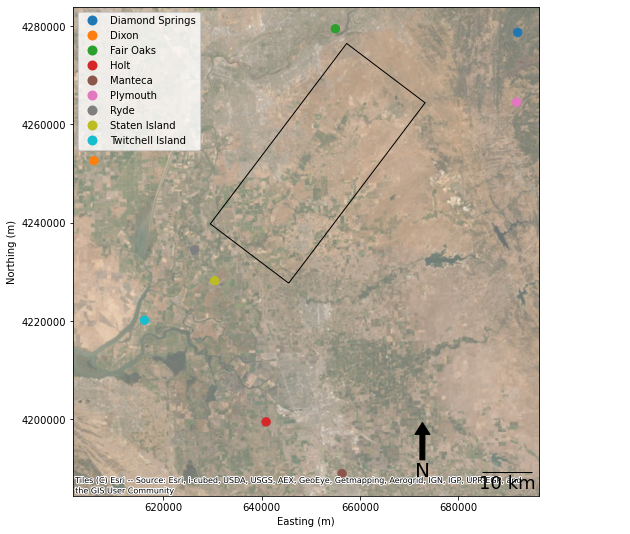

In [20]:
# plot cimis stations for presentation
fig,ax= plt.subplots(figsize=(9,9))
coords.plot('Stn Name', markersize = 70, marker = 'o', legend = True, ax=ax)

mb.plot(edgecolor = 'black', color = 'none', ax = ax)

ctx.add_basemap(ax, source = ctx.providers.Esri.WorldImagery, crs='epsg:26910', alpha = 0.6)
# ctx.add_basemap(ax, source = ctx.providers.Esri.WorldStreetMap, crs='epsg:26910')

x, y, arrow_length = 0.75, 0.15, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

ax.ticklabel_format(style='plain')

fontprops = fm.FontProperties(size=18)
scalebar = AnchoredSizeBar(ax.transData,
                           10000, '10 km', 'lower right', pad=0.1, sep=2,  color='black',
                           frameon=False,size_vertical=1, fontproperties=fontprops)
ax.add_artist(scalebar)

plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')

plt.savefig('Plots/Model_SFR_UZF_progress/cimis_stations_map.png', dpi = 600, bbox_inches='tight')

In [35]:
daily_data = pd.read_csv(uzf_path+'\\Cosumnes_dailyET_precip_2010_01_01_to_2019_12_31.csv',index_col = ['Date'], parse_dates = True)
# clean up data so columns are by location, units of ETo are in mm
ET = daily_data.pivot_table(index = 'Date', columns = ['Stn Id', 'Stn Name', 'CIMIS Region'], values = 'ETo (mm)')
ET.iloc[-1:-10:-1].values.shape

# clean up data so columns are by location, units of Precip are in mm
rain = daily_data.pivot_table(index = 'Date', columns = ['Stn Id', 'Stn Name', 'CIMIS Region'], values = 'Precip (mm)')
rain.iloc[-1:-10:-1].values.shape

(9, 9)

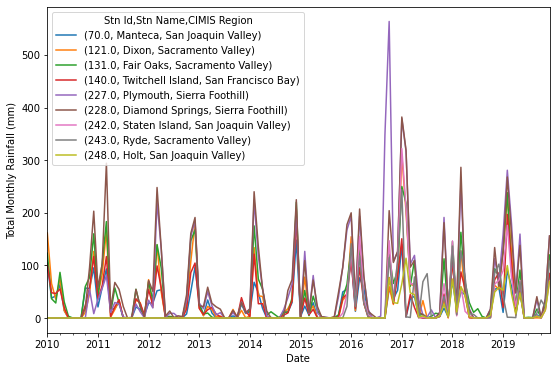

In [52]:
fig,ax = plt.subplots(figsize=(9,6))
# rain.mean(axis=1).plot()
# rain.plot(ax=ax)
# plt.ylabel('Daily Rainfall (mm)')

rain.resample('M').sum().plot(ax=ax)
plt.ylabel('Total Monthly Rainfall (mm)')

plt.savefig('Plots/Model_SFR_UZF_progress/rain_fall_summary.png', dpi = 600, bbox_inches='tight')

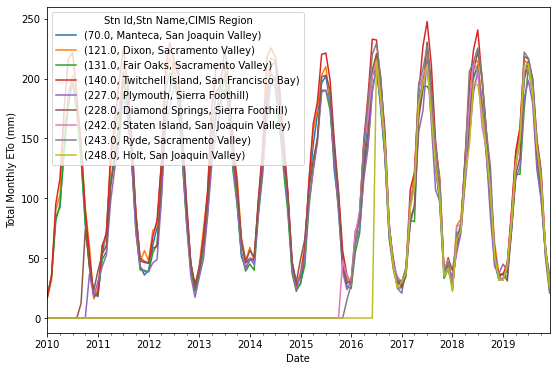

In [53]:
fig,ax = plt.subplots(figsize=(9,6))
# ET.mean(axis=1).plot()
# ET.plot(ax=ax)
# plt.ylabel('Daily ETo (mm)')

ET.resample('M').sum().plot(ax=ax)
plt.ylabel('Total Monthly ETo (mm)')

plt.savefig('Plots/Model_SFR_UZF_progress/ETo_summary.png', dpi = 600, bbox_inches='tight')

### soil property plotting

In [24]:

grid_uzf = gpd.read_file(uzf_path+'/final_grid_uzf/griduzf.shp')

soilKs_array = np.loadtxt(uzf_path+'/final_soilKs.tsv', delimiter = '\t')
soiln_array = np.loadtxt(uzf_path+'/final_soiln.tsv', delimiter = '\t')
soileps_array = np.loadtxt(uzf_path+'/final_soileps.tsv', delimiter = '\t')


In [27]:
grid_uzf.columns

Index(['node', 'SPATIALVER', 'mukey', 'FID', 'Porosity_R', 'Ksat_Rep',
       'PSDI_Rep', 'EPS', 'index_righ', 'row', 'column', 'geometry'],
      dtype='object')

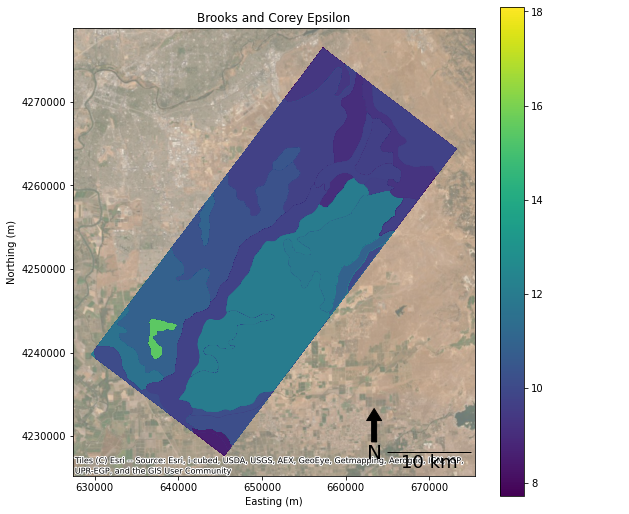

In [34]:
fig,ax= plt.subplots(figsize=(9,9))

grid_uzf.plot('EPS', legend = True, ax=ax)

ctx.add_basemap(ax, source = ctx.providers.Esri.WorldImagery, crs='epsg:26910', alpha = 0.6)
# ctx.add_basemap(ax, source = ctx.providers.Esri.WorldStreetMap, crs='epsg:26910')

x, y, arrow_length = 0.75, 0.15, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

ax.ticklabel_format(style='plain')

fontprops = fm.FontProperties(size=18)
scalebar = AnchoredSizeBar(ax.transData,
                           10000, '10 km', 'lower right', pad=0.1, sep=2,  color='black',
                           frameon=False,size_vertical=1, fontproperties=fontprops)
ax.add_artist(scalebar)
plt.title('Brooks and Corey Epsilon')
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')

plt.savefig('Plots/Model_SFR_UZF_progress/Brooks_corey_epsilon_map.png', dpi = 600, bbox_inches='tight')

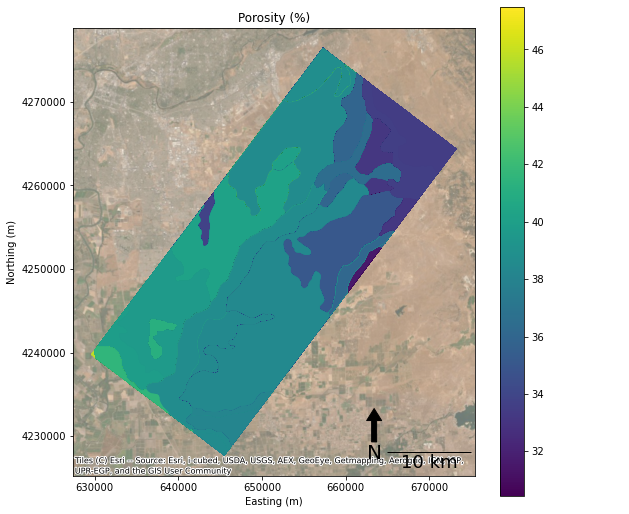

In [33]:
fig,ax= plt.subplots(figsize=(9,9))

grid_uzf.plot('Porosity_R',legend = True,ax=ax)

ctx.add_basemap(ax, source = ctx.providers.Esri.WorldImagery, crs='epsg:26910', alpha = 0.6)
# ctx.add_basemap(ax, source = ctx.providers.Esri.WorldStreetMap, crs='epsg:26910')

x, y, arrow_length = 0.75, 0.15, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

ax.ticklabel_format(style='plain')

fontprops = fm.FontProperties(size=18)
scalebar = AnchoredSizeBar(ax.transData,
                           10000, '10 km', 'lower right', pad=0.1, sep=2,  color='black',
                           frameon=False,size_vertical=1, fontproperties=fontprops)
ax.add_artist(scalebar)
plt.title('Porosity (%)')
plt.xlabel('Easting (m)')
plt.ylabel('Northing (m)')

plt.savefig('Plots/Model_SFR_UZF_progress/porosity_map.png', dpi = 600, bbox_inches='tight')

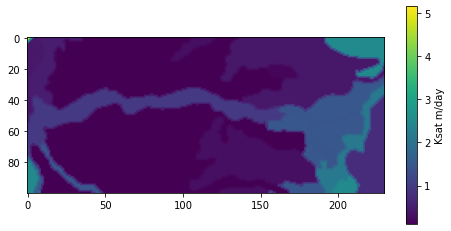

In [23]:
fig, ax = plt.subplots(figsize = (8,8))
plt.imshow(soilKs_array)
plt.colorbar(label = 'Ksat m/day', shrink = 0.5)
# plt.savefig('Plots/Model_SFR_UZF_Progress/Ksat_from_soil_map.png', dpi = 300)